<h1>Project Proposal</h1>


<h3>Description:</h3>

Missed outpatient appointments are a common problem for clinics, and reducing this rate improves office efficiency, income, and utilize the time to help other patients. Identifying specific reasons why some patients miss outpatient appointments may provide insight into developing targeted approaches to reducing their rates. 

The goal of this project is to better understand which factors are most important in missing appointments, and how those factors relate to show/no show rate.

<h3>Question/need:</h3>

**What is the framing question of your analysis, or the purpose of the model/system you plan to build?**
1. which factors are most important in missing appointments?
2. which date range did the missing occurred?
3.
4.

**Who benefits from exploring this question or building this model/system?**

Healthcare providers

<h3>Data Description:</h3>

What dataset(s) do you plan to use, and how will you obtain the data?
What is an individual sample/unit of analysis in this project? What characteristics/features do you expect to work with?
If modeling, what will you predict as your target?

* 110527 rows
* 14 columns with 12 features
* We will check if there is missing values.

Each row represents a patient information, each column contains patient’s attributes described on the column Metadata.

- ***The data set includes information about***:
1. PatientId: Identification of a patient
2. AppointmentID: Identification of each appointment
3. Gender: Male or Female.
4. DataMarcacaoConsulta: The day of the actuall appointment.
5. DataAgendamento: The day someone called or registered the appointment.
6. Age: How old is the patient.
7. Neighbourhood: Where the appointment takes place.
8. Scholarship: True of False . Observation #We will check this later
9. Hipertension: True or False
10. Diabetes: True or False
11. Alcoholism: True or False
12. Handcap: True or False
13. SMS_received: 1 or more messages sent to the patient.
14. No-show: True or False.

**Tools**:

To start exploring this goal, we will use ML models for classification (will update later)

# Step 0: Import Libraries

In [396]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
sns.set(style="white")
%matplotlib inline

# Step 1: Read the Data

In [397]:
df=pd.read_csv(r'C:\Users\asmaa\Downloads\KaggleV2-May-2016.csv')

In [398]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### <font color='red'> <i> What is the Target Variable?

classification: show / no show

# Step 2: Data Cleaning

check columns
chect dtypes
duplicates
unnecessary columns


In [399]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [400]:
df.Age = df.Age.replace(-1, 0)

In [401]:
df.describe(exclude="number")

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [402]:
df.columns = df.columns.str.replace('No-s','S').str.strip()

In [403]:
def transform(x):
    if x == 'No':
        return 1
    else:
        return 0

df['Show'] = df['Show'].apply(transform)

In [404]:
df.drop(['AppointmentID'], axis=1, inplace=True)

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   Gender          110527 non-null  object 
 2   ScheduledDay    110527 non-null  object 
 3   AppointmentDay  110527 non-null  object 
 4   Age             110527 non-null  int64  
 5   Neighbourhood   110527 non-null  object 
 6   Scholarship     110527 non-null  int64  
 7   Hipertension    110527 non-null  int64  
 8   Diabetes        110527 non-null  int64  
 9   Alcoholism      110527 non-null  int64  
 10  Handcap         110527 non-null  int64  
 11  SMS_received    110527 non-null  int64  
 12  Show            110527 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 11.0+ MB


In [406]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [407]:
df.Show.value_counts()
#unbalanced

1    88208
0    22319
Name: Show, dtype: int64

In [408]:
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: re.sub('[a-zA-Z]', ' ', x, flags=re.UNICODE))
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: re.sub('[a-zA-Z]', ' ', x, flags=re.UNICODE))

In [409]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['SD_day_of_week'] = df['ScheduledDay'].dt.day_name()
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['AD_day_of_week'] = df['AppointmentDay'].dt.day_name()

In [410]:
df['Difference'] = (df['ScheduledDay'] - df['AppointmentDay']).dt.days

In [411]:
df.Difference=df.Difference.replace([1,2,3,4,5,6], np.nan)
#df.isnull().sum()
df.dropna(inplace=True)

In [412]:
df.SD_day_of_week[df['SD_day_of_week']=='Saturday'].count()

24

In [413]:
df.AD_day_of_week[df['AD_day_of_week']=='Saturday'].count()

39

In [414]:
df[df.duplicated()].count()

PatientId         618
Gender            618
ScheduledDay      618
AppointmentDay    618
Age               618
Neighbourhood     618
Scholarship       618
Hipertension      618
Diabetes          618
Alcoholism        618
Handcap           618
SMS_received      618
Show              618
SD_day_of_week    618
AD_day_of_week    618
Difference        618
dtype: int64

In [415]:
df=df.drop_duplicates()

In [416]:
df.PatientId.duplicated().sum()
#df[df.PatientId.duplicated()]

47605

In [417]:
df['Duplicate'] = df['PatientId'].duplicated(keep=False).map({True:1, False:0})

In [418]:
df1=df[(df['Duplicate']==1) & (df['Show']==0) ].sort_values(by=['PatientId'])

In [419]:
df1= df1[df1.PatientId.duplicated()]
df1.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,SD_day_of_week,AD_day_of_week,Difference,Duplicate
25202,1.224513e+08,M,2016-04-07 12:39:53,2016-05-02,28,JESUS DE NAZARETH,0,0,0,0,0,0,0,Thursday,Monday,-25.0,1
50736,5.225847e+08,F,2016-04-26 15:44:59,2016-05-16,3,SANTA CECÍLIA,0,0,0,0,0,0,0,Tuesday,Monday,-20.0,1
50732,5.225847e+08,F,2016-04-26 15:44:32,2016-05-16,3,SANTA CECÍLIA,0,0,0,0,0,0,0,Tuesday,Monday,-20.0,1
7705,2.237714e+09,M,2016-04-27 18:34:55,2016-05-03,54,ANDORINHAS,1,1,0,1,0,0,0,Wednesday,Tuesday,-6.0,1
63972,3.996325e+09,M,2016-05-11 08:51:23,2016-05-16,37,ANDORINHAS,0,0,0,0,0,0,0,Wednesday,Monday,-5.0,1


# Step 3: EDA

#### <font color='red'> <i> Use atleast one appropriate visuals in each of the below

<AxesSubplot:>

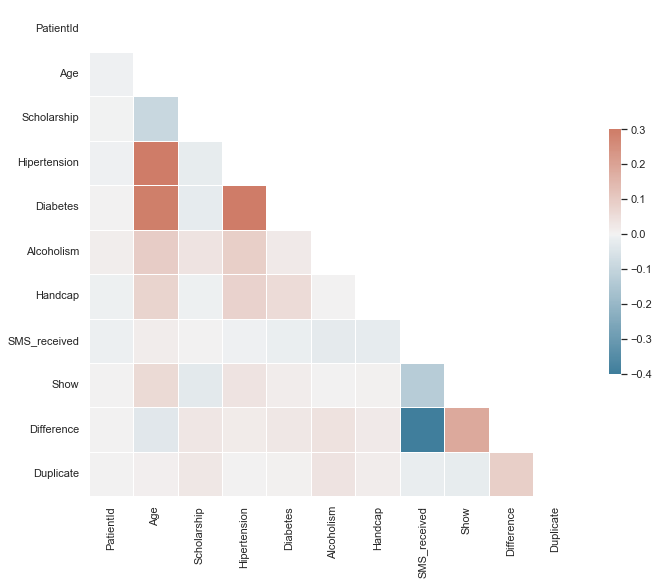

In [420]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<h3>3.1 Target variable</h3>

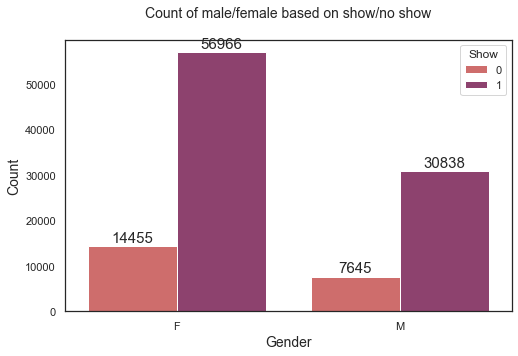

In [421]:
plt.figure(figsize=(8, 5))
plots = sns.countplot(x="Gender", hue="Show", data=df, palette='flare')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Gender", size=14)
plt.ylabel("Count", size=14)
plt.title("Count of male/female based on show/no show\n", size=14)
plt.show()

Around <b>20.31%</b> of females have missed their appointments compared to men <b>(19.96%)</b>. Moreover, most reservations are from femals <b>(64.99%)</b> which indicates a good health care from their side.

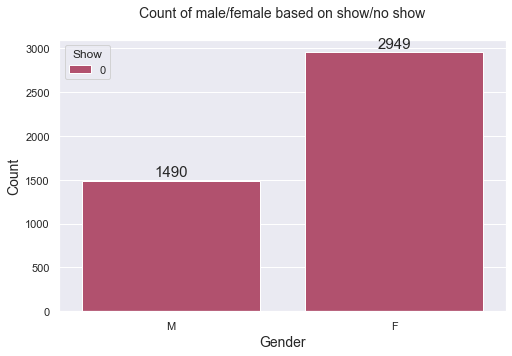

In [422]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
plots = sns.countplot(x="Gender", hue="Show", data=df1, palette='flare')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Gender", size=14)
plt.ylabel("Count", size=14)
plt.title("Count of male/female based on show/no show\n", size=14)
plt.show()

Around <b>4.03%</b> of these patients have missed their appointments twice or more.(<b>4.13%</b> F, <b>3.87%</b> M )

### 3.2. Numerical features


<AxesSubplot:xlabel='Age', ylabel='Count'>

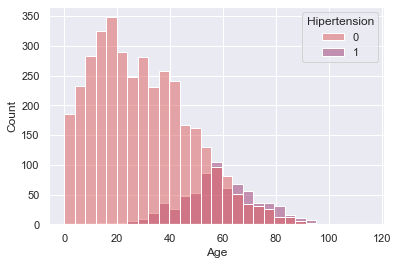

In [423]:
sns.histplot(x='Age', data=df1, hue='Hipertension', palette='flare')

<AxesSubplot:xlabel='AD_day_of_week', ylabel='Count'>

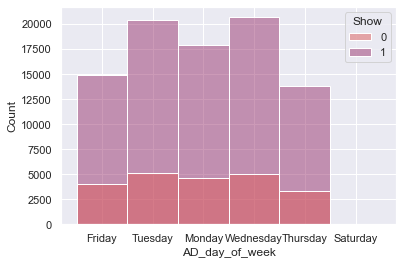

In [424]:
sns.histplot(x='AD_day_of_week', data=df, hue='Show', palette='flare')
#sns.histplot(x='SD_day_of_week', data=df, hue='Show', palette='flare')

<AxesSubplot:xlabel='Difference'>

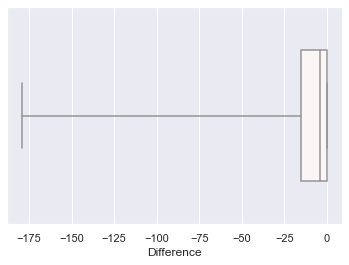

In [425]:
sns.boxplot(x="Difference", data=df,
            whis=[0, 100], width=.6, palette="vlag")

There were wrong dates (reservetion date after appointment date<b> (difference>0)</b>), There are also reservations that exceed 5 months.

<AxesSubplot:xlabel='Show', ylabel='SMS_received'>

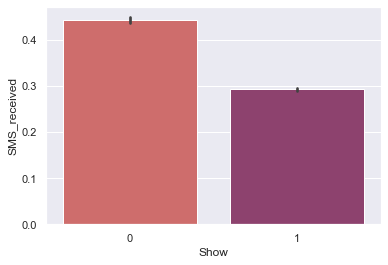

In [426]:
#target
sns.set_style('darkgrid')
sns.barplot(x='Show',y='SMS_received', data=df, palette='flare')

<AxesSubplot:xlabel='Difference', ylabel='Show'>

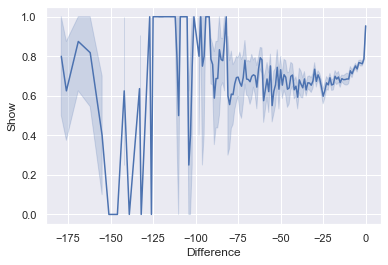

In [427]:
#df_copy = df1.query("Difference <-1")
#sns.histplot(x='Difference', data=df_copy, hue='SMS_received', palette='flare', kde=True)
sns.lineplot(data=df, x="Difference", y="Show")

### 3.3 Categorical Features

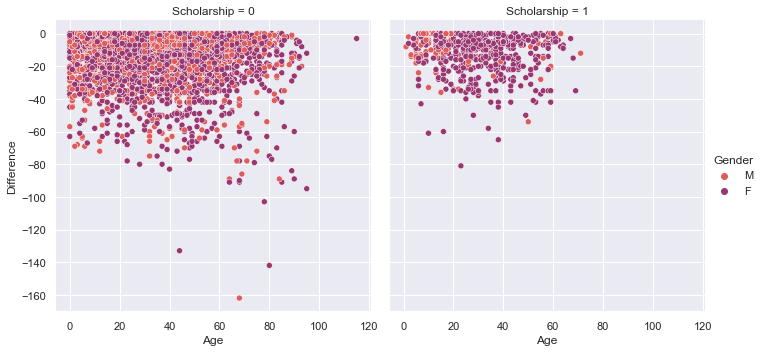

In [428]:
#df_copy1 = df.query("Gender == 1")
sns.relplot(x='Age', y ='Difference',hue='Gender', col ='Scholarship',data=df1, palette='flare')

In [429]:
Neighbourhood

NameError: name 'Neighbourhood' is not defined

# Step 4: Data Pre-Processing

In [430]:
df.Gender=df.Gender.replace('F', 1)
df.Gender=df.Gender.replace('M', 0)

In [431]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,SD_day_of_week,AD_day_of_week,Difference,Duplicate
0,2.987250e+13,1,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,Friday,0.0,1
1,5.589978e+14,0,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,Friday,0.0,1
2,4.262962e+12,1,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,Friday,0.0,1
3,8.679512e+11,1,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday,Friday,0.0,1
4,8.841186e+12,1,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday,Friday,0.0,0


In [432]:
df.drop(['PatientId','ScheduledDay','AppointmentDay','SD_day_of_week','AD_day_of_week','Neighbourhood'], axis=1, inplace=True)
X = df.drop(columns = 'Show')
y = df.Show

In [433]:
#Split Data into Train vs Test 
from sklearn.model_selection  import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Step 5: Baseline Model

In [434]:
# Standerdize the Dataset
from sklearn.preprocessing import MinMaxScaler

numeric_features = ['Gender','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','Difference','Duplicate']
scaler = MinMaxScaler()
for col in numeric_features:
    scaler.fit(X_train[col].values.reshape(-1,1))
    X_train[col] = scaler.transform(X_train[col].values.reshape(-1,1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1,1))

In [435]:
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression
# 1. Create object 

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("The Model Accuracy is {:.2f}%,\
      Recall is {:.2f}%, Percision is {:.2f}%, \
      F1-Score is {:.2f}% ".format(lr_model.score(X_test, y_test)*100,
                                    recall_score(y_test,y_pred)*100 ,
                                   precision_score(y_test,y_pred)*100, 
                                  f1_score(y_test,y_pred) *100
))

The Model Accuracy is 79.48%,      Recall is 99.22%, Percision is 79.92%,       F1-Score is 88.53% 


# Step 6: Bagging Algorithms

In [436]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("The Model Accuracy is {:.2f}%,\
      Recall is {:.2f}%, Percision is {:.2f}%,  \
      F1-Score is {:.2f}% ".format(rf_model.score(X_test, y_test)*100,
                                    recall_score(y_test,y_pred)*100 ,
                                   f1_score(y_test,y_pred)*100 ,
                                   precision_score(y_test,y_pred) *100
))

The Model Accuracy is 75.93%,      Recall is 90.06%, Percision is 85.66%,        F1-Score is 81.66% 


<AxesSubplot:>

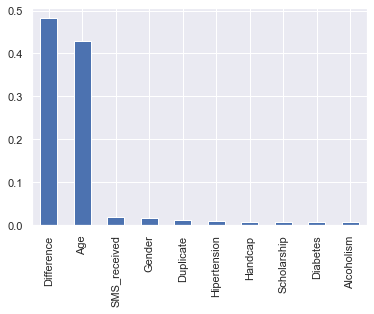

In [437]:
importance =  rf_model.feature_importances_
importance_series = pd.Series(importance, index = X_train.columns).sort_values(ascending=False)
importance_series.plot.bar()

# Step 6: Boosting Algorithms

In [438]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2)

In [439]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
gbm = xgb.XGBClassifier( 
                        n_estimators=800,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )
y_p= gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)

print("The Model Accuracy is {:.2f}%,\
      Recall is {:.2f}%, Percision is {:.2f}%,  \
      F1-Score is {:.2f}% ".format(gbm.score(X_test, y_test)*100,
                                    recall_score(y_test,y_p)*100 ,
                                   f1_score(y_test,y_p)*100 ,
                                   precision_score(y_test,y_p) *100
))

C:\Users\asmaa\anaconda3\envs\metis\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The Model Accuracy is 79.82%,      Recall is 99.95%, Percision is 88.77%,        F1-Score is 79.84% 


C:\Users\asmaa\anaconda3\envs\metis\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


# NN

In [442]:
!pip install keras

In [446]:
!pip install tensorflow

In [448]:
!pip install keras_metrics

In [457]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras_metrics

np.random.seed(2)

# create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(15, input_dim=10, activation='relu')) # input layer requires input_dim param
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1


model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
model.summary()
model.fit(X_train, y_train, 
          validation_data=(X_val, y_val),
          epochs=5, batch_size=64)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 15)                165       
                                                                 
 dense_16 (Dense)            (None, 10)                160       
                                                                 
 dense_17 (Dense)            (None, 8)                 88        
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_18 (Dense)            (None, 1)                 9         
                                                                 
Total params: 422
Trainable params: 422
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


C:\Users\asmaa\anaconda3\envs\metis\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


888/902 [============================>.] - ETA: 0s - loss: 0.5143 - accuracy: 0.7895 - precision: 0.8028 - recall: 0.9193 - f1_score: 0.8521WARNING:tensorflow:`add_update` `inputs` kwarg has been deprecated. You no longer need to pass a value to `inputs` as it is being automatically inferred.


C:\Users\asmaa\anaconda3\envs\metis\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


902/902 [==============================] - 7s 4ms/step - loss: 0.5141 - accuracy: 0.7897 - precision: 0.8027 - recall: 0.9202 - f1_score: 0.8526 - val_loss: 0.4920 - val_accuracy: 0.7962 - val_precision: 0.8001 - val_recall: 0.9840 - val_f1_score: 0.8826
Epoch 2/5
902/902 [==============================] - 4s 4ms/step - loss: 0.4960 - accuracy: 0.8004 - precision: 0.7999 - recall: 0.9896 - f1_score: 0.8847 - val_loss: 0.4899 - val_accuracy: 0.7962 - val_precision: 0.7997 - val_recall: 0.9926 - val_f1_score: 0.8858
Epoch 3/5
902/902 [==============================] - 3s 4ms/step - loss: 0.4914 - accuracy: 0.8004 - precision: 0.7995 - recall: 0.9941 - f1_score: 0.8862 - val_loss: 0.4887 - val_accuracy: 0.7962 - val_precision: 0.7996 - val_recall: 0.9952 - val_f1_score: 0.8867
Epoch 4/5
902/902 [==============================] - 3s 4ms/step - loss: 0.4881 - accuracy: 0.8004 - precision: 0.7995 - recall: 0.9959 - f1_score: 0.8869 - val_loss: 0.4871 - val_accuracy: 0.7962 - val_precision: 0

In [458]:
model.evaluate(X_test, y_test)

1031/1031 [==============================] - 3s 3ms/step - loss: 0.4817 - accuracy: 0.7979 - precision: 0.7993 - recall: 0.9973 - f1_score: 0.8874


[0.4816884696483612,
 0.7979194521903992,
 0.7992601990699768,
 0.9973357915878296,
 0.8873786330223083]